In [1]:
%%time
%run -i 'myimports.py'
# %run -i "youtube_extraction.py"
# %run -i "nlp_processing.py"
%run -i "timestamp_generation"

#get collection of documents (minute of podcast) in a list
file = "2Lex/#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"
document_size = 500
topic_size = 1000

wordcount = pod_word_count(file)
processed_pod = parallel_process(podcast_to_collection(file, document_size)) #break podcast into documents of 500 words, and return normalized documents

dictionary = gensim.corpora.Dictionary(processed_pod) #create dictionary for words
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000) 
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_pod] #dict for how many times each word appears

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=int(wordcount/topic_size), id2word=dictionary, passes=8)



#for topics in lda model idx, topic in lda_model.print_topics(-1)
#for prediction
# bow_vector = dictionary.doc2bow(preprocess(unseen_document))
# sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])


#need to optimize number of topics in a document, how many previous sentences and after sentences will current sentence be compared to, alpha and beta values for LDA

#will process each podcast sentence by sentence. Will determine if each sentence leads to a new topic. 
#If longish question, high probability of new topic. 
#Each sentence topic probability will be compared to previous x number of sentence topics before and after


CPU times: user 1.65 s, sys: 1.14 s, total: 2.8 s
Wall time: 8.47 s


In [5]:
#bow topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.033*"stori" + 0.033*"exist" + 0.022*"say" + 0.022*"suffer" + 0.019*"play" + 0.019*"physic" + 0.018*"materi" + 0.015*"aspect" + 0.015*"feel" + 0.011*"best"
Topic: 1 
Words: 0.029*"chain" + 0.029*"cool" + 0.021*"today" + 0.021*"close" + 0.017*"work" + 0.017*"outsid" + 0.017*"small" + 0.017*"climat" + 0.012*"certain" + 0.012*"good"
Topic: 2 
Words: 0.038*"child" + 0.030*"industri" + 0.030*"revolut" + 0.023*"civil" + 0.023*"societi" + 0.023*"feed" + 0.015*"cours" + 0.015*"million" + 0.015*"intuit" + 0.015*"dynam"
Topic: 3 
Words: 0.049*"societi" + 0.035*"innov" + 0.028*"effect" + 0.021*"institut" + 0.021*"result" + 0.021*"good" + 0.021*"instanc" + 0.021*"chang" + 0.014*"wrong" + 0.014*"certain"
Topic: 4 
Words: 0.035*"plant" + 0.022*"cell" + 0.019*"organ" + 0.019*"spirit" + 0.018*"child" + 0.016*"go" + 0.013*"good" + 0.012*"mean" + 0.012*"regul" + 0.011*"function"
Topic: 5 
Words: 0.029*"podcast" + 0.024*"express" + 0.022*"spiral" + 0.015*"fractal" + 0.015*"point" + 0.01

In [64]:
unseen_document = ""
with open(file, "r") as r:
    lines = r.readlines()
    for line in lines:
        unseen_document+=line.replace("\n", " ")
    unseen_document = " ".join(unseen_document.split(" ")[2600:3200])
# unseen_document = "This is basically the project of A.I. or you could say the project of AI is a very important component in it."
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])
# for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
#     print("Score: {}\t Topic: {}\t Words: {}".format(score, index, lda_model.print_topic(index, 5)))

[(1, 0.7163267), (8, 0.277476)]

In [18]:
unseen_document = ""
window = 100 #number of words to find topic, will change to sentences

with open(file, "r") as r:
    words = int(len(r.read().split(" "))) #split all words in file by space
with open(file, "r") as r: # strip new lines
    lines = r.readlines()
    for line in lines:
        unseen_document+=line.replace("\n", " ")

for i in range(0, words, window): #for each window print main topics
    excerpt = " ".join(unseen_document.split(" ")[i:i+window*2])
    print(i/window)
    bow_vector = dictionary.doc2bow(preprocess(excerpt))
    print(sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])[:3]) #sort possible topics by descending confidence value
    

0.0
[(4, 0.8282861), (10, 0.15757605)]
1.0
[(4, 0.98329043)]
2.0
[(4, 0.9826829)]
3.0
[(4, 0.98236215)]
4.0
[(4, 0.6201634), (16, 0.3633849)]
5.0
[(16, 0.96326464), (5, 0.021399705)]
6.0
[(16, 0.9846385)]
7.0
[(16, 0.9813253)]
8.0
[(16, 0.97732353)]
9.0
[(16, 0.8204918), (17, 0.15796427)]
10.0
[(17, 0.7047723), (16, 0.2755576)]
11.0
[(17, 0.97835404)]
12.0
[(17, 0.9801579)]
13.0
[(17, 0.9805628)]
14.0
[(17, 0.5867009), (5, 0.28633937), (8, 0.10605189)]
15.0
[(5, 0.7959827), (17, 0.11061787), (1, 0.07141965)]
16.0
[(5, 0.97198665)]
17.0
[(5, 0.9682524)]
18.0
[(5, 0.979295)]
19.0
[(5, 0.83458996), (0, 0.14694367)]
20.0
[(0, 0.708925), (5, 0.27003178)]
21.0
[(0, 0.981325)]
22.0
[(0, 0.9783538)]
23.0
[(0, 0.97929484)]
24.0
[(0, 0.79373014), (1, 0.18919772)]
25.0
[(1, 0.6488662), (0, 0.25836852), (16, 0.0741302)]
26.0
[(1, 0.97973585)]
27.0
[(1, 0.98056316)]
28.0
[(1, 0.97929555)]
29.0
[(1, 0.7535991), (8, 0.2290007)]
30.0
[(8, 0.7445341), (1, 0.23901464)]
31.0
[(8, 0.98203015)]
32.0
[(8, 0

In [22]:
topic_confidence = np.zeros([topicnum, int(words/window)])
for i in range(0, int(words/window)):
    excerpt = " ".join(unseen_document.split(" ")[i:i*window+window*2]) #topic in double window size to represent topics in window and transition
    bow_vector = dictionary.doc2bow(preprocess(excerpt))
    for topic in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])[:3]:
        if topic[1] > .15:
            topic_confidence[topic[0]][i] = topic[1]
    print(sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1])[:3])

[(4, 0.8282206), (10, 0.1576415)]
[(4, 0.87873197), (10, 0.11164227)]
[(4, 0.89565074), (10, 0.0966158)]
[(4, 0.9219045), (10, 0.071898125)]
[(4, 0.8169957), (16, 0.106026), (10, 0.07196528)]
[(4, 0.6814364), (16, 0.26372418), (10, 0.050616637)]
[(4, 0.60649294), (16, 0.34585032), (10, 0.043945868)]
[(4, 0.55432594), (16, 0.40368402), (10, 0.038601805)]
[(4, 0.51544404), (16, 0.44469136), (10, 0.03671307)]
[(16, 0.46647954), (4, 0.46404114), (10, 0.037492555)]
[(4, 0.45717812), (16, 0.44229656), (17, 0.0634815)]
[(4, 0.42535868), (16, 0.42225972), (17, 0.118925475)]
[(4, 0.3982146), (16, 0.39070356), (17, 0.1795579)]
[(4, 0.373481), (16, 0.36858192), (17, 0.22742017)]
[(16, 0.35914218), (4, 0.3561041), (17, 0.22029084)]
[(16, 0.33843493), (4, 0.33265612), (17, 0.21828283)]
[(16, 0.33135536), (4, 0.3203033), (17, 0.21624853)]
[(16, 0.32116348), (4, 0.31029963), (17, 0.20016985)]
[(16, 0.30290958), (4, 0.28858364), (5, 0.19130103)]
[(16, 0.28891006), (4, 0.2772762), (5, 0.20366639)]
[(16

In [57]:
for topics in range(topicnum):
    print(topics, np.count_nonzero(topic_confidence[topics]))

0 11
1 0
2 0
3 43
4 38
5 5
6 0
7 0
8 2
9 214
10 1
11 0
12 0
13 0
14 0
15 0
16 63
17 6
18 0
19 0
20 0


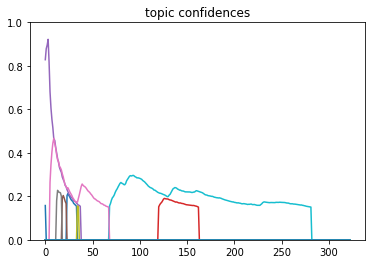

In [24]:
import matplotlib.pyplot as plt  
x = np.arange(0, int(words/window))
plt.title("topic confidences")
plt.ylim(0,1)
for i in range(topicnum):
    plt.plot(x,topic_confidence[i], label="Topic: "+str(i))
# plt.legend()
plt.show()